# CIFAR-10 TensorFlow

### Necessary Imports 

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [25]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Dropout
import matplotlib.pyplot as plt


### Loading CIFAR-10 DataSet 

In [5]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Data Preprocessing 

In [6]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
Y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


In [9]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [10]:
# Target is 2D array so we need to flatten them as it is the format that tensorflow accepts

y_train, y_test = y_train.flatten(), y_test.flatten()


In [11]:
# Rescaling 

X_train, X_test = X_train / 255. , X_test / 255.

In [12]:
print("y_train shape: ", y_train.shape)

y_train shape:  (50000,)


In [13]:
# Getting number of classes

k = len(set(y_train))
print("Number of classes are:", k)

Number of classes are: 10


###  Building Model Architecture

In [15]:
# Using tf.keras functional API

input_ = Input(shape=X_train[0].shape)
hidden = Conv2D(32, (3,3), strides=2, activation='relu')(input_)
hidden = Conv2D(64, (3,3), strides=2, activation='relu')(hidden)
hidden = Conv2D(128, (3,3), strides=2, activation='relu')(hidden)
hidden = Flatten()(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(k, activation='softmax')(hidden)

model = Model(input_, hidden)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336

### Model Compilation

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Evaluating Model without Training 

In [19]:
model.evaluate(X_train, y_train) # Nearly 10% Accuracy equivalent to random guessing of 10 classes

50000/50000 [==============================] - 12s 244us/sample - loss: 2.3042 - accuracy: 0.0955


[2.3042425939941404, 0.09554]

### Training Model

In [20]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 45s 897us/sample - loss: 1.5071 - accuracy: 0.4518 - val_loss: 1.2274 - val_accuracy: 0.5582
Epoch 2/10
50000/50000 [==============================] - 39s 780us/sample - loss: 1.1705 - accuracy: 0.5835 - val_loss: 1.0587 - val_accuracy: 0.6219
Epoch 3/10
50000/50000 [==============================] - 39s 785us/sample - loss: 1.0192 - accuracy: 0.6393 - val_loss: 0.9715 - val_accuracy: 0.6592
Epoch 4/10
50000/50000 [==============================] - 39s 783us/sample - loss: 0.9185 - accuracy: 0.6753 - val_loss: 0.9440 - val_accuracy: 0.6745
Epoch 5/10
50000/50000 [==============================] - 40s 803us/sample - loss: 0.8302 - accuracy: 0.7085 - val_loss: 0.8721 - val_accuracy: 0.6935
Epoch 6/10
50000/50000 [==============================] - 49s 973us/sample - loss: 0.7545 - accuracy: 0.7335 - val_loss: 0.9212 - val_accuracy: 0.6800
Epoch 7/10
50000/50000 [====================

### Ploting Loss per Iteration

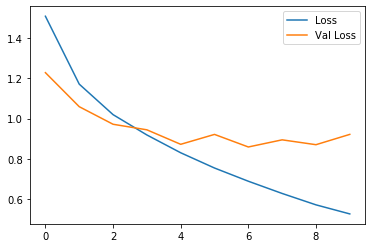

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.legend()

### Ploting Accuracy per Iteration

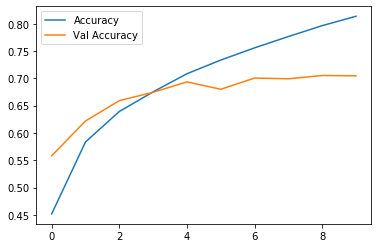

In [22]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.legend()

### Improving CIFAR-10

In [26]:
# A new model architecture

input_ = Input(shape=X_train[0].shape)

# =====================================>
hidden = Conv2D(32, (3,3), strides=1, activation='relu', padding='same')(input_)
hidden = BatchNormalization()(hidden)
hidden = Conv2D(32, (3,3), strides=1, activation='relu', padding='same')(hidden)
hidden = BatchNormalization()(hidden)
hidden = MaxPooling2D((2,2))(hidden)
hidden = Dropout(0.2)(hidden)

# =====================================>
hidden = Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(input_)
hidden = BatchNormalization()(hidden)
hidden = Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(hidden)
hidden = BatchNormalization()(hidden)
hidden = MaxPooling2D((2,2))(hidden)
hidden = Dropout(0.2)(hidden)

# =====================================>
hidden = Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(input_)
hidden = BatchNormalization()(hidden)
hidden = Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(hidden)
hidden = BatchNormalization()(hidden)
hidden = MaxPooling2D((2,2))(hidden) 
hidden = Dropout(0.2)(hidden)

# =====================================>
hidden = Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(input_)
hidden = BatchNormalization()(hidden)
hidden = Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(hidden)
hidden = BatchNormalization()(hidden)
hidden = GlobalMaxPooling2D()(hidden)

# =====================================>
hidden = Flatten()(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(k, activation='softmax')(hidden)

model = Model(input_, hidden)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
global_max_pooling2d (Global (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0   

### Compiling Model

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
  576/50000 [..............................] - ETA: 52:12 - loss: 3.9478 - accuracy: 0.1397

KeyboardInterrupt: 